In [3]:
import pandas as pd
import numpy as np

In [5]:
df=pd.read_csv('Section 1 data.csv')
df.head()

,Review_Date,Review_Text,User_ID,Business_ID,Business_Name,Business_Category,City,State,Latitude,Longitude,Avg_Business_Star_Rating
0,2014-07-16,okay...so so,6VxJJX7h36bMCCFt7URg6w,9QqLqYIwV-n1BJPjnaYv8A,Beef 'O' Brady's,Bars,Chandler,AZ,33.303847,-111.946838,3.5
1,2014-07-16,Some people complain about the prices but Subw...,viGPiPuMZnV4PR_aiA3-qw,pNQwnY_q4okdlnPiR-3RBA,Empire Bagels,Food,Las Vegas,NV,36.077299,-115.297979,3.5
2,2014-07-16,"Had red curry chicken, the chicken itself was ...",rwehMCinfBjhZ0IbR1zFBw,shCdCHRbnY5FTMJbWl-myQ,Thai Spices,Thai,Mesa,AZ,33.412708,-111.875803,4.0
3,2014-07-16,"Alright, I gave the restaurant manager ample t...",VWqt5IH8fm-k9M0CKFkJzg,HpaYCM_NCauI72LLXxC6SA,Yonaka Modern Japanese,Tapas/Small Plates,Las Vegas,NV,36.114935,-115.209737,4.5
4,2014-07-16,Blehhhh :/ this place shouldn't even be in bus...,Y6-0ToMhjBsm8iYEaT2meg,FC4q3hJyF8oo984xoo3RMg,808 Sushi,Sushi Bars,Las Vegas,NV,36.052181,-115.279227,3.5


In [23]:
#1.	How many unique restaurants could be found in this data set? (Hint: Use the [Business_ID] column for this evaluation.) 
df['Business_ID'].is_unique
df.drop_duplicates(subset=['Business_ID'], inplace=False)['Business_ID'].count()

30276

In [22]:
df.drop_duplicates(subset=['Business_ID'], inplace=False)['Business_ID'].count()

30276

In [70]:
#2.	Which restaurant received the highest number of reviews? What about percentage-wise?  
df_res = df[(df['Business_Category'] == 'Restaurants')]
df_res
#['Restaurants']

,Review_Date,Review_Text,User_ID,Business_ID,Business_Name,Business_Category,City,State,Latitude,Longitude,Avg_Business_Star_Rating
21,2014-07-16,This place lost two new customers due to a lac...,DiYeEXNHa_FUkjCg7Evp9g,CCHoB_VAjaN6x0GNlgl86w,Times Square Neighborhood Italian Restaurant,Restaurants,Phoenix,AZ,33.654840,-112.065049,3.0
28,2014-07-16,My hubby and I were driving around for about a...,mKYJEb2E9ZZFv1vNWZhnuA,G90xX0E76dEIq51x4RxtVQ,Zappone's Italian Bistro,Restaurants,Gilbert,AZ,33.380516,-111.724395,4.0
215,2014-07-16,Our first time. After hearing the commercials ...,cFxVQ0ovR-6HiO8EipBwHA,YJJ1eOz1gdh_bSy8DKmaNQ,The Sicilian Restorante,Restaurants,Las Vegas,NV,36.100336,-115.099161,4.0
229,2014-07-16,if you sit outside be prepared to wait a long ...,t3ucXJn1uFxA5orzpvVQuA,MdciqXUq0nf-bJHYmI6etw,Bonanno's New York Pizzeria Restaurant & Bar,Restaurants,Las Vegas,NV,36.109068,-115.172557,3.5
232,2014-07-16,I came here on Mother's day this year with my ...,JatzOG3XS_LMFAoKjOPQug,ZjtM7uKu9ZdsVMj_n5besg,Zeffirino's,Restaurants,Las Vegas,NV,36.121200,-115.170000,5.0
...,...,...,...,...,...,...,...,...,...,...,...
227457,2006-01-08,I don't give a lot of restaurants ratings this...,ZvBA5dEJYObIiFB7GPzKFQ,6qXQQOWdUZiJmWVqkWB-3w,Il Fornaio,Restaurants,Las Vegas,NV,36.103001,-115.173516,3.5
227492,2005-12-10,Passable middle eastern and mediterranean food...,Bvh3IHeMzSPnJAe5QlBsSw,nbpY3tbPrAksoqOrYwlx7Q,Husnu's,Restaurants,Madison,WI,43.074868,-89.395245,3.5
227527,2005-10-27,some of the best italian and seafood in Las Ve...,ytjqLRFobRxl0DDJgoR-Eg,nNczqTna7cD1bDh0AbEPGQ,Cafe Chloe,Restaurants,Las Vegas,NV,36.113647,-115.261080,3.5
227534,2005-10-21,"Located in the Orleans Hotel, this classy and ...",mA-JeZ5IaTQfKzNAeCYUoQ,II61MipcxrqZunv-bpqSUw,Sazio Italian Dining,Restaurants,Las Vegas,NV,36.102244,-115.200972,2.5


In [152]:
df_res1=df_res.groupby('Business_ID')
review_count=df_res1['Review_Text'].count()
#max reviews
print(review_count.max())
#total
print(review_count.sum())
#The name
rest_with_max_reviews = review_count[review_count == review_count.max()]
rest_name = df_res[df_res['Business_ID'].isin(rest_with_max_reviews.index)]['Business_Name'].unique()
print(rest_name)
#percentage-wise
per=review_count.max()/review_count.sum()
print(per)
#answer is 3.09%

201
6513
['LAVO Italian Restaurant & Lounge']
0.030861354214647627


In [166]:
#3.	Which cities have got at least one 5-star review in Nevada (NV) state? 
df_nv=df[df['State']=='NV']
df_nv_star=df_nv[df_nv['Avg_Business_Star_Rating']>=5]
df_nv_star['City'].unique()

array(['Las Vegas', 'Henderson', 'Boulder City', 'Nellis'], dtype=object)

In [167]:
#4.	Which city has the highest number of reviews in the Business Category of “Hotels & Travel”? What about percentage-wise?
df_h = df[(df['Business_Category'] == 'Hotels & Travel')]

In [175]:
df_h1=df_h.groupby('City')
review_count=df_h1['Review_Text'].count()
#max reviews
print(review_count.max())
#total
print(review_count.sum())
#The name
h_with_max_reviews = review_count[review_count == review_count.max()]
h_name = df_h[df_h['City'].isin(h_with_max_reviews.index)]['City'].unique()
print(h_name)
#percentage-wise
per=review_count.max()/review_count.sum()
print(per)
#answer is 77.6%

10245
13195
['Las Vegas']
0.7764304660856385


In [196]:
#5.	At what day of the week people are more likely to post their reviews? 
df['Review_Date'] = pd.to_datetime(df['Review_Date'])
df['Weekday_Name'] = df['Review_Date'].dt.day_name()
weekday_name_group = df.groupby('Weekday_Name')['Review_Text'].count()
max_day = weekday_name_group[weekday_name_group == weekday_name_group.max()]
name = df[df['Weekday_Name'].isin(max_day.index)]['Weekday_Name'].unique()
print(name)

['Monday']


C:\Users\user\AppData\Local\Temp\ipykernel_6632\2814944952.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res['Review_Date'] = pd.to_datetime(df_res['Review_Date'])
C:\Users\user\AppData\Local\Temp\ipykernel_6632\2814944952.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_res['Year_Month'] = df_res['Review_Date'].dt.to_period('M')


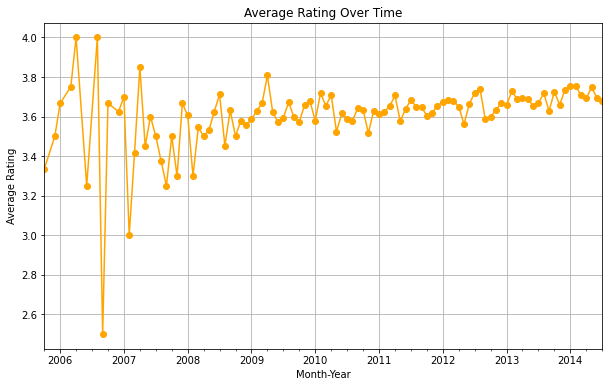

In [201]:
#6.	Showcase if there are any trends regarding restaurant performance as time goes by. 
import matplotlib.pyplot as plt
df_res['Review_Date'] = pd.to_datetime(df_res['Review_Date'])
df_res['Year_Month'] = df_res['Review_Date'].dt.to_period('M')
monthly_reviews = df_res.groupby('Year_Month')['Review_Text'].count()


monthly_avg_rating = df_res.groupby('Year_Month')['Avg_Business_Star_Rating'].mean()
# Plot the trend of average ratings over time
plt.figure(figsize=(10,6))
monthly_avg_rating.plot(kind='line', marker='o', color='orange')
plt.title('Average Rating Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Average Rating')
plt.grid(True)
plt.show()
#It seems they became more stable

In [206]:
#7.	Based on analyzed data showcase if there are any steps that the restaurant can take to improve their public appeal. 
state_avg_rating = df_res.groupby('State')['Avg_Business_Star_Rating'].mean()
state_avg_rating

#They can move to EDH State

State
AZ     3.667631
EDH    3.757732
MLN    3.500000
NV     3.660709
ON     3.543478
WI     3.520270
Name: Avg_Business_Star_Rating, dtype: float64

In [236]:
#8.	Bonus Question – Based on this data set which user had the highest cumulative travel distance? 
#What distance has been covered by him/her?
from math import radians, sin, cos, sqrt, atan2
def haversine(lat1, lon1, lat2, lon2):
    R = 6371.0  # Radius of Earth in kilometers
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    return R * c

In [237]:
df['Distance'] = np.nan
df = df.sort_values(by=['User_ID', 'Review_Date'])
for i in range(1, len(df)):
    if df.loc[i, 'User_ID'] == df.loc[i-1, 'User_ID']:
        lat1, lon1 = df.loc[i-1, ['Latitude', 'Longitude']]
        lat2, lon2 = df.loc[i, ['Latitude', 'Longitude']]
        df.loc[i, 'Distance'] = haversine(lat1, lon1, lat2, lon2)
# cumulative distance for each user
df['Cumulative_Distance'] = df.groupby('User_ID')['Distance'].cumsum()

# the total distance traveled by each user
total_distance_by_user = df.groupby('User_ID')['Distance'].sum().reset_index()

# the user with the highest cumulative distance
max_travel_user = total_distance_by_user.loc[total_distance_by_user['Distance'].idxmax()]
user_with_max_distance = max_travel_user['User_ID']
max_distance_covered = max_travel_user['Distance']

print(f"User with the highest cumulative travel distance: {user_with_max_distance}")
print(f"Total distance covered by him: {max_distance_covered} km")

User with the highest cumulative travel distance: FLdun6KWwAh-gC8VHVZGCw
Total distance covered by him: 2236.7852442670915 km
